In [1]:
import cv2
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Dropout, Input
from tensorflow.keras.utils import to_categorical, pad_sequences
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import applications

2023-06-02 09:12:08.039106: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 09:12:08.174855: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 09:12:08.175395: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 09:12:09.231804: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dog_path = '/home/bteam/work/data/PetImages/Dog/'
cat_path = '/home/bteam/work/data/PetImages/Cat/'
dog_file_list = glob(dog_path+'*.jpg')
cat_file_list = glob(cat_path+'*.jpg')

In [3]:
X = np.zeros((5000,150,150,3))
for idx, files in enumerate(dog_file_list[:2500]):
    try:
        dt = plt.imread(files)
        dt = cv2.resize(dt,(150,150))
        dt = dt[:,:,:3]
        X[idx] = dt
    except:
        '-----'

for idx, file in enumerate(cat_file_list[:2500]):
    try:
        dt = plt.imread(files)
        dt = cv2.resize(dt,(150,150))
        dt = dt[:,:,:3]
        X[idx+2500] = dt
    except:
        '-----'
    

In [4]:
y = np.concatenate([np.zeros(2500), np.ones(2500)])

In [5]:
predict_model = VGG16(include_top=False, input_shape=(150,150,3))

In [6]:
predict_x = predict_model.predict(X)

2023-06-02 09:12:26.938023: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1350000000 exceeds 10% of free system memory.


157/157 [==============================] - 197s 1s/step


In [7]:
model = Sequential(
    [
        Flatten(input_shape=(4,4,512)),
        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dense(1, activation='sigmoid')
    ]
)

In [9]:
opt = 'adam'
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt, loss=loss, metrics=metrics)

In [10]:
model.fit(predict_x,y, epochs=20)

Epoch 1/20
157/157 [==============================] - 2s 9ms/step - loss: 0.0109 - accuracy: 0.9978
Epoch 2/20
157/157 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 3/20
157/157 [==============================] - 1s 9ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 4/20
157/157 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 0.9998
Epoch 5/20
157/157 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.9998
Epoch 6/20
157/157 [==============================] - 1s 8ms/step - loss: 0.0020 - accuracy: 0.9998
Epoch 7/20
157/157 [==============================] - 1s 9ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 8/20
157/157 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.9998
Epoch 9/20
157/157 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 0.9998
Epoch 10/20
157/157 [==============================] - 2s 10ms/step - loss: 0.0021 - accuracy: 0.999

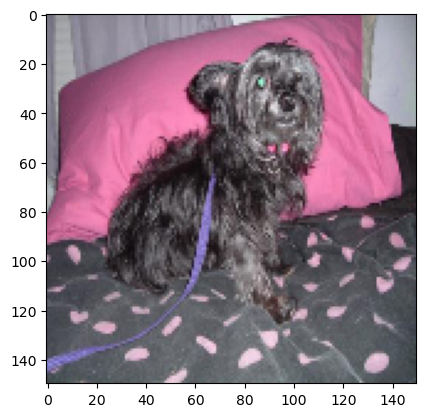

In [11]:
plt.imshow(X[0].astype(np.uint8))

In [10]:
pred = predict_model.layers.copy()

In [11]:
pred.extend(model.layers)

In [12]:
model = Sequential(pred)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)      

In [14]:
model.save('cat_dog_model.h5')

In [15]:
cat_dog = load_model('cat_dog_model.h5')

In [16]:
def cat_dog_predict(x):
    dt = plt.imread(x)
    dt = cv2.resize(dt,(150,150))
    dt = dt[:,:,:3]
    data = dt.reshape(1,150,150,3)
    result = cat_dog.predict(data)
    result = np.where(result < .5, '강아지', '고양이')
    print(result[0][0])
    plt.imshow(dt)
    plt.show()

1/1 [==============================] - 0s 203ms/step
강아지


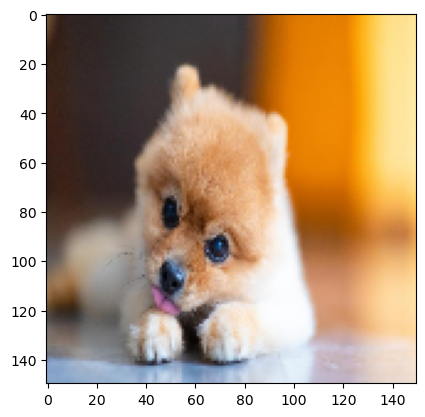

In [17]:
cat_dog_predict('4.jpg')

1/1 [==============================] - 0s 92ms/step
강아지


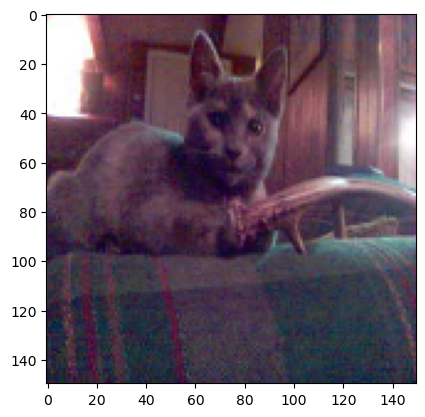

In [18]:
cat_dog_predict('data/PetImages/Cat/411.jpg')